In [1]:
import requests
import pandas as pd
import plotly.express as px

In [2]:
def getData(lat, lon, sites, variables = ['temperature_2m','cloud_cover']):

    lat = ','.join(lat)
    lon = ','.join(lon)
    variables = ','.join(variables)

    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly={variables}&models=ecmwf_ifs025,ecmwf_aifs025,bom_access_global,gfs_global&timezone=GMT"

    # Retrieve ECMWF temperatures
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()

    else:
        print("Error retrieving ACCESS data from Open Meteo API.")



    def makeFrame(siteData):
        mdata = pd.DataFrame(siteData['hourly'])
        mdata.index = pd.to_datetime(mdata['time'])
        mdata = mdata.drop('time', axis =1)
        return mdata

    dlist = []
    for d, site in zip(data, sites):
        df = makeFrame(d)
        df['site'] = site
        dlist.append(df)

    return pd.concat(dlist)

In [12]:
lat = ['-27.470','-37.67']
lon = ['153','144.83']
sites = ['Brisbane','Melbourne']
variables = ['temperature_2m','cloud_cover']

In [16]:
locs = pd.DataFrame([lat,lon, sites]).T
locs.columns = ['lat','lon','site']


In [19]:
data[data.site == 'Brisbane'].columns

AttributeError: 'dict' object has no attribute 'site'

In [49]:
sitedata = data[data.site == 'Brisbane']
sitedata.loc[:, sitedata.columns != 'site']
fig = px.line(sitedata, x=sitedata.index, y = sitedata.columns)
fig.show()

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [47]:
data[data.site == 'Brisbane']

,temperature_2m_ecmwf_ifs025,cloud_cover_ecmwf_ifs025,temperature_2m_ecmwf_aifs025,cloud_cover_ecmwf_aifs025,temperature_2m_bom_access_global,cloud_cover_bom_access_global,temperature_2m_gfs_global,cloud_cover_gfs_global,site
time,,,,,,,,,
2024-04-18 00:00:00,24.1,71,24.5,47,22.6,100,24.8,100,Brisbane
2024-04-18 01:00:00,25.0,67,24.9,42,23.3,100,25.8,100,Brisbane
2024-04-18 02:00:00,25.5,61,25.1,35,24.3,100,24.3,100,Brisbane
2024-04-18 03:00:00,25.6,52,25.2,26,24.8,100,23.9,100,Brisbane
2024-04-18 04:00:00,25.5,41,25.2,17,24.8,100,23.9,100,Brisbane
...,...,...,...,...,...,...,...,...,...
2024-04-24 19:00:00,19.6,99,17.0,0,18.2,100,17.6,86,Brisbane
2024-04-24 20:00:00,20.3,94,18.1,0,18.1,100,17.5,71,Brisbane
2024-04-24 21:00:00,21.0,89,19.5,0,18.3,89,18.0,57,Brisbane


In [50]:
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Forecast'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select site:"),
    dcc.Dropdown(
        id="site",
        options=locs.site,
        value="Brisbane",
        clearable=False,
    ),
])


@app.callback(Output("time-series-chart", "figure"), 
              Input("site", "value"))
def display_time_series(site):
    data = getData(lat, lon, sites)
    sitedata = data[data.site == 'Brisbane']
    sitedata = sitedata.loc[:, sitedata.columns != 'site']
    fig = px.line(sitedata, x=sitedata.index, y = sitedata.columns)
    return fig


app.run_server(debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


In [1]:
import pandas as pd

In [2]:
scatter_geo_df = pd.read_csv('./siteList.csv' ,skipinitialspace=True,usecols= ['site','lat','lon'])

In [3]:
mySite = scatter_geo_df[scatter_geo_df['site'] == 'Brisbane']

In [4]:
mySite.lat

2   -27.4698
Name: lat, dtype: float64

In [5]:
from om_extract import getData

In [20]:
df = getData( [str(mySite.lat.values[0])] , [str(mySite.lon.values[0])]  ,['Brisbane'])

TypeError: string indices must be integers

In [11]:
lat = [str(mySite.lat.values[0])] 
lon = [str(mySite.lat.values[0])]  
variables = ['temperature_2m','cloud_cover']

In [8]:
import requests

In [9]:
url

NameError: name 'url' is not defined

In [12]:
    lat = lat[0]
    lon = lon[0]
    variables = ','.join(variables)

    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly={variables}&models=ecmwf_ifs025,ecmwf_aifs025,bom_access_global,gfs_global&timezone=GMT"

    # Retrieve ECMWF temperatures
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()

    else:
        print("Error retrieving ACCESS data from Open Meteo API.")




In [16]:
 def makeFrame(siteData):
        mdata = pd.DataFrame(siteData['hourly'])
        mdata.index = pd.to_datetime(mdata['time'])
        mdata = mdata.drop('time', axis =1)
        return mdata

In [18]:
makeFrame(data)

,temperature_2m_ecmwf_ifs025,cloud_cover_ecmwf_ifs025,temperature_2m_ecmwf_aifs025,cloud_cover_ecmwf_aifs025,temperature_2m_bom_access_global,cloud_cover_bom_access_global,temperature_2m_gfs_global,cloud_cover_gfs_global
time,,,,,,,,
2024-04-21 00:00:00,22.5,31,22.6,31,22.8,11,22.5,16
2024-04-21 01:00:00,22.5,29,22.6,30,22.8,14,22.2,0
2024-04-21 02:00:00,22.3,32,22.5,26,22.8,6,22.2,6
2024-04-21 03:00:00,22.2,32,22.4,21,22.6,14,22.0,5
2024-04-21 04:00:00,22.2,23,22.3,15,22.5,9,22.1,21
...,...,...,...,...,...,...,...,...
2024-04-27 19:00:00,20.0,22,20.5,0,19.3,30,20.0,56
2024-04-27 20:00:00,20.0,20,20.6,0,19.6,23,19.9,33
2024-04-27 21:00:00,20.0,19,20.7,0,19.9,6,19.8,10


In [29]:
data = getData(lat, lon, sites)

In [104]:
data

,temperature_2m_ecmwf_ifs025,cloud_cover_ecmwf_ifs025,temperature_2m_ecmwf_aifs025,cloud_cover_ecmwf_aifs025,temperature_2m_bom_access_global,cloud_cover_bom_access_global,temperature_2m_gfs_global,cloud_cover_gfs_global,site
time,,,,,,,,,
2024-04-18 00:00:00,24.1,71,24.5,47,22.6,100,24.8,100,Brisbane
2024-04-18 01:00:00,25.0,67,24.9,42,23.3,100,25.8,100,Brisbane
2024-04-18 02:00:00,25.5,61,25.1,35,24.3,100,24.3,100,Brisbane
2024-04-18 03:00:00,25.6,52,25.2,26,24.8,100,23.9,100,Brisbane
2024-04-18 04:00:00,25.5,41,25.2,17,24.8,100,23.9,100,Brisbane
...,...,...,...,...,...,...,...,...,...
2024-04-24 19:00:00,8.4,31,9.6,22,8.2,9,10.3,59,Melbourne
2024-04-24 20:00:00,9.4,31,10.2,22,8.2,33,9.9,32,Melbourne
2024-04-24 21:00:00,10.4,31,10.9,22,8.4,42,9.9,6,Melbourne


In [21]:
mdata = pd.DataFrame(data['hourly'])

In [23]:
mdata

,time,temperature_2m_ecmwf_ifs025,cloud_cover_ecmwf_ifs025,temperature_2m_ecmwf_aifs025,cloud_cover_ecmwf_aifs025,temperature_2m_bom_access_global,cloud_cover_bom_access_global,temperature_2m_gfs_global,cloud_cover_gfs_global
0,2024-04-18T00:00,24.1,71,24.5,47,22.6,100,24.8,100
1,2024-04-18T01:00,25.0,67,24.9,42,23.3,100,25.8,100
2,2024-04-18T02:00,25.5,61,25.1,35,24.3,100,24.3,100
3,2024-04-18T03:00,25.6,52,25.2,26,24.8,100,23.9,100
4,2024-04-18T04:00,25.5,41,25.2,17,24.8,100,23.9,100
...,...,...,...,...,...,...,...,...,...
163,2024-04-24T19:00,19.6,99,17.0,0,18.2,100,18.8,86
164,2024-04-24T20:00,20.3,94,18.1,0,18.1,100,18.6,71
165,2024-04-24T21:00,21.0,89,19.5,0,18.3,89,18.8,57
166,2024-04-24T22:00,21.8,83,21.0,0,19.1,70,19.5,68


In [63]:
from datetime import datetime
from datetime import timedelta
UTC_today = datetime.utcnow().strftime('%Y-%m-%d')
Forecastend = (datetime.utcnow() + timedelta(days=7)).strftime('%Y-%m-%d')


latitude = '21.171419'
longitude = '119.742783'

start_date = UTC_today
end_date = Forecastend

# API endpoint and parameters for ECMWF and GFS
ACC_url = f'https://ensemble-api.open-meteo.com/v1/ensemble?latitude={latitude}&longitude={latitude}&hourly=direct_normal_irradiance&wind_speed_unit=ms&models=bom_access_global_ensemble'
ecmwf_url = f'https://ensemble-api.open-meteo.com/v1/ensemble?latitude={latitude}&longitude={latitude}&hourly=direct_normal_irradiance&wind_speed_unit=ms&models=ecmwf_ifs025'

# Retrieve ECMWF temperatures
response_acc = requests.get(ACC_url)
if response_acc.status_code == 200:
    data_acc_ml = response_acc.json()

    # Extract ECMWF hourly forecasts within the specified date range
    #hourly_forecasts_ecmwf = [forecast for forecast in data_ecmwf['hourly']['temperature_2m_1h'] if start_date <= forecast['time'][:10] <= end_date]
else:
    print("Error retrieving ACCESS data from Open Meteo API.")

# Retrieve ECMWF temperatures
response_ecmwf = requests.get(ecmwf_url)
if response_ecmwf.status_code == 200:
    data_ecmwf = response_ecmwf.json()

    # Extract ECMWF hourly forecasts within the specified date range
    #hourly_forecasts_ecmwf = [forecast for forecast in data_ecmwf['hourly']['temperature_2m_1h'] if start_date <= forecast['time'][:10] <= end_date]
else:
    print("Error retrieving ECMWF data from Open Meteo API.")


In [64]:
response_ecmwf

<Response [200]>

In [65]:
ACG = pd.DataFrame(data_acc_ml['hourly'])
ACG.index = pd.to_datetime(ACG['time'])
ACG = ACG.drop('time', axis =1)

<Axes: xlabel='time'>

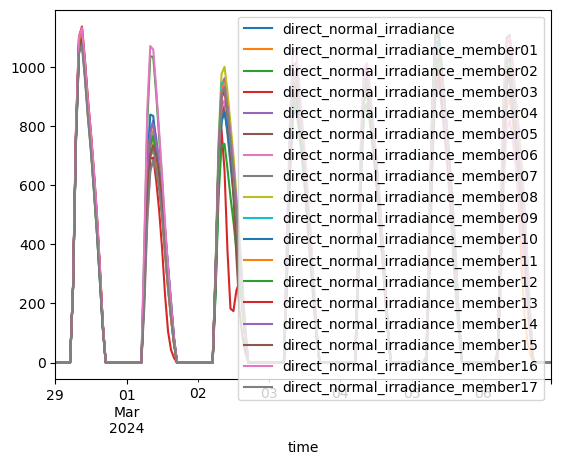

In [66]:
ACG.plot()

In [67]:
ACG

,direct_normal_irradiance,direct_normal_irradiance_member01,direct_normal_irradiance_member02,direct_normal_irradiance_member03,direct_normal_irradiance_member04,direct_normal_irradiance_member05,direct_normal_irradiance_member06,direct_normal_irradiance_member07,direct_normal_irradiance_member08,direct_normal_irradiance_member09,direct_normal_irradiance_member10,direct_normal_irradiance_member11,direct_normal_irradiance_member12,direct_normal_irradiance_member13,direct_normal_irradiance_member14,direct_normal_irradiance_member15,direct_normal_irradiance_member16,direct_normal_irradiance_member17
time,,,,,,,,,,,,,,,,,,
2024-02-29 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-29 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-29 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-29 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-29 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-06 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-06 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-06 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
import numpy as np
def getPercentiles(df):
    """for dataframe, cal percentiles"""
    perList = []
    for data in df.iterrows():
        percentiles = {}

        percentiles['valid_time'] = data[0]
        percentiles["mean"] = data[1].mean()
        percentiles["max"] = data[1].max()
        percentiles["min"] = data[1].min()
        percentiles[str(90)] = np.percentile(data[1], 90)
        percentiles[str(10)] = np.percentile(data[1], 10)
        percentiles[str(25)] = np.percentile(data[1], 25)
        percentiles[str(75)] = np.percentile(data[1], 75)

        perList.append(pd.DataFrame([percentiles]))

    df = pd.concat(perList)
    df.index = df.valid_time
    return df[['mean', 'max', 'min', '90', '10',
       '25', '75']]

In [69]:
percentiles = getPercentiles(ACG)

In [70]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [71]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1, subplot_titles=("Plot 1", "Plot 2"))
for n in ACG.columns:
    data = ACG.sort_index()
    fig.add_trace(go.Scatter(x=data.index, y=data[n].values,
                             name = n[-2:], 
                             mode = 'lines',
                             line=dict(shape='linear'),
                             marker = dict(color = 'rgba(192, 192, 192, 0.75)'),
                             connectgaps=True,
                             showlegend= False
                             )
                 , row=1, col = 1)

for n in percentiles.columns:
    fig.add_trace(go.Scatter(x=percentiles.index, y=percentiles[n],
                            name = n,
                            mode = 'lines',
                            line=dict(shape='linear'),
                            #marker = dict(color = 'rgba(255, 0, 0, 0.75)'),
                            connectgaps=True,
                            #showlegend= False
                            )
                , row=2, col = 1)



names = {'Plot 1':'Members', 'Plot 2':'Probabilities'}

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
    
fig.add_annotation(text='AG: 17 Members', 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.8,
                    y=-0.2,
                    xanchor='left',
                    yanchor='bottom',
                    bordercolor='black',
                    borderwidth=1)
fig.add_annotation(text="Lat: "+latitude+" Lon: "+longitude, 
                    align='right',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.2,
                    y=-0.15,
                    xanchor='right',
                    yanchor='top',
                    xshift=-1,
                    yshift=-5,
                    bordercolor='black',
                    borderwidth=1)

fig.update_layout(
    autosize=False,
    width=850,
    height=700,
    hovermode= 'x',
    title = "ACCESS-G Ensemble <br>"+data.index[0].strftime("%Y-%m-%d %Hz"),
    #showlegend=False,
    template = "simple_white",
    yaxis_title = 'Irradiance (MWH)',
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),)
fig.write_html("superens_Irr.html")
fig.show()
 
 

In [54]:
for n in ACG.columns:
    n

In [57]:
n[-2:]

'17'